1. One variable and plot that variable (4) different ways. Pros and cons.
2. Two continuous variables, and plot them (3) different ways. Pros and cons.
3. One continuous variable and one categorical variable, and plot them (6) different ways. Pros and cons.
4. (Optional) Four continuous variables and one categorical variable, (1) master plot that gives insight into the variables and their interrelationships, including: Probability distributions, Bivariate relationships, Whether the distributions or the relationships vary across groups. Accompany your plot with a written description of what you see.

**One variable - Plot variable (4) different ways**

HISTOGRAM
* Pros: Can easily see the relative frequency of data in a given bin
* Cons: No way to see what is the cause of that frequency

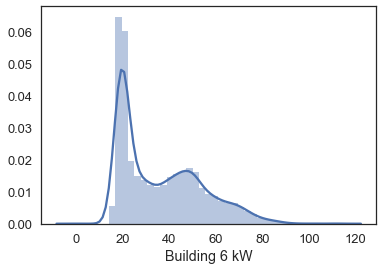

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
 
df = pd.read_csv('building60preoffice.csv')
kW = df['Building 6 kW']
sns.distplot(kW)
plt.show()

RUGPLOT
* Pros: Can easily see the distribution of data.
* Cons: When ticks are too concentrated, they provide minimal value.

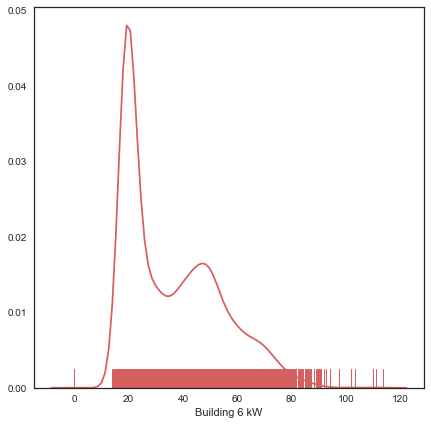

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
 
df = pd.read_csv('building60preoffice.csv')
kW = df['Building 6 kW']
sns.distplot(kW, hist=False, rug=True, color="r")
plt.show()

BOXPLOT
* Pros: Can easily see bias and outliers
* Cons: No way to see what is the cause of that bias

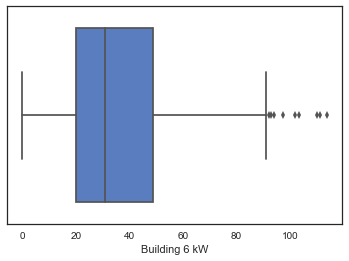

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
 
df = pd.read_csv('building60preoffice.csv')
kW = df['Building 6 kW']
sns.boxplot(kW)
plt.show()

VIOLIN PLOT
* Pros: Can easily see the relative frequency of data in a given bin
* Cons: No way to see what is the cause of that frequency

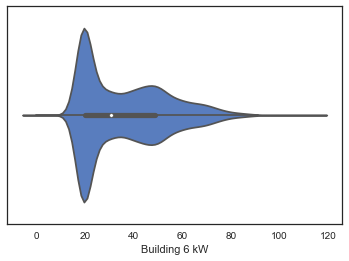

In [67]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
 
df = pd.read_csv('building60preoffice.csv')
kW = df['Building 6 kW']
sns.violinplot(kW)
plt.show()

**Two continuous variables - plot (3) different ways.**

SCATTER PLOT
* Pros: Can see every distinct point, including outliers
* Cons: Cannot see density of points

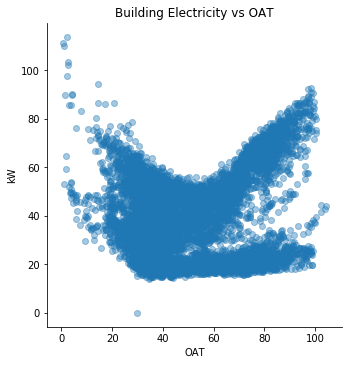

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('building60preoffice.csv')
OAT = df['OAT']
kW = df['Building 6 kW']
g = sns.lmplot(y='Building 6 kW', x='OAT',data=df, fit_reg=False,scatter_kws={'alpha':0.4})
g.set_ylabels("kW")
g.set_xlabels("OAT")
plt.title('Building Electricity vs OAT')
plt.show()

JOINT KERNAL DENSITY ESTIMATE
* Pros: Can easily see where points are clustered
* Cons: Outliers are excluded

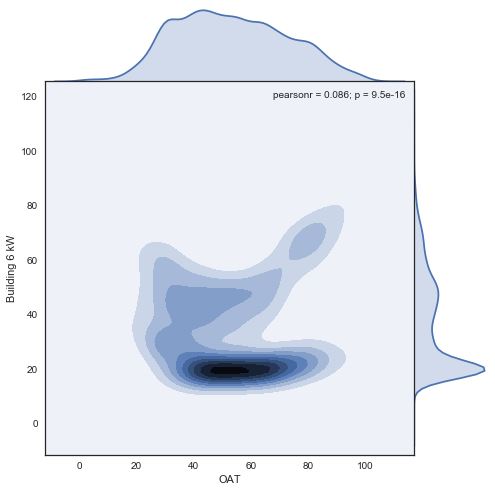

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")

df = pd.read_csv('building60preoffice.csv')
OAT = df['OAT']
kW = df['Building 6 kW']

g = sns.jointplot(OAT, kW, kind="kde", size=7, space=0)
plt.show()

HEXBIN PLOT WITH MARGINAL DISTRIBUTIONS
* Pros: Can generally see where points are clustered
* Cons: Outliers are excluded, bins format can make it difficult to see general trends 

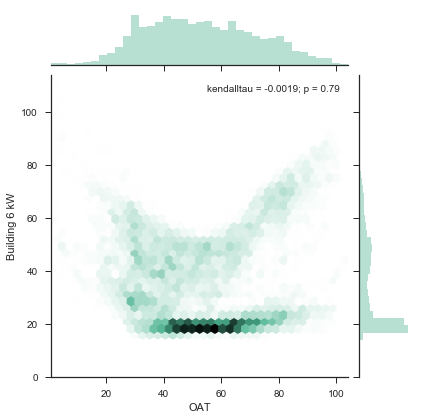

In [41]:
import numpy as np
from scipy.stats import kendalltau
import seaborn as sns
sns.set(style="ticks")

df = pd.read_csv('building60preoffice.csv')
OAT = df['OAT']
kW = df['Building 6 kW']

sns.jointplot(OAT, kW, kind="hex", stat_func=kendalltau, color="#4CB391")
plt.show()

**One continuous variable and one categorical variable - Plot (6) different ways.**

MULTIPLE BIVARIATE KDE PLOTS
Note: Technically two continuous variables and one categorical variable
* Pros: Can easily see where points are clustered
* Cons: Outliers are excluded, categories overlap, making the category that's further back difficult to see

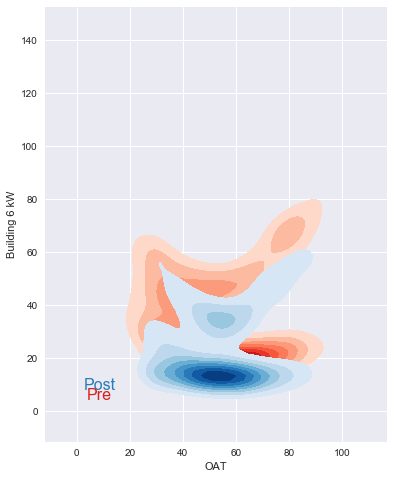

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

df_Pre = pd.read_csv('building60preoffice.csv')
OAT_Pre = df_Pre['OAT']
kW_Pre = df_Pre['Building 6 kW']

df_Post = pd.read_csv('building62postoffice.csv')
OAT_Post = df_Post['OAT']
kW_Post = df_Post['Building 6 kW']

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(OAT_Pre, kW_Pre,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(OAT_Post, kW_Post,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "Post", size=16, color=blue)
ax.text(3.8, 4.5, "Pre", size=16, color=red)
plt.show()

HEAT MAP (Note: Actually 3 continuous variables)

* Pros: Can easily see distribution of values and relationship between variables
* Cons: Considerable pre-processing necessary from original dataset

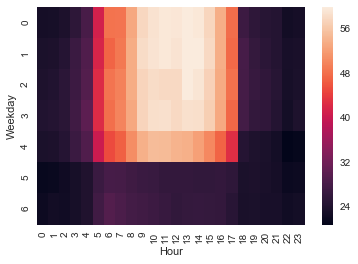

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import *

df = pd.read_csv('building60preoffice.csv')
OccTime = pd.to_datetime(df['Date'])
OccWeekday = []
OccHour = []
kW = df['Building 6 kW']

#Fill empty arrays with weekday and time info only
for i in range(len(OccTime)):
    OccWeekday.append(OccTime[i].weekday())
    OccHour.append(OccTime[i].hour)

#Combine arrays into dataframe and average data
df2 = pd.DataFrame() 
df2['Weekday'] = pd.Series(OccWeekday, index=df.index)
df2['Hour'] = pd.Series(OccHour, index=df.index)
df2['kW'] = pd.Series(kW, index=df.index)
df3 = pivot_table(df2, values='kW', index=['Weekday'],columns=['Hour'], aggfunc=np.mean)

# Draw a heatmap with the numeric values in each cell
sns.set()
ax = sns.heatmap(df3)
plt.show()